In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/indian-food-101/indian_food.csv


# Получаем данные:

In [2]:
df = pd.read_csv('/kaggle/input/indian-food-101/indian_food.csv')
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


* prep_time - время подготовки
* cook_time - время готовки

In [3]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


# Какие есть диеты:

In [4]:
df.diet.unique()

array(['vegetarian', 'non vegetarian'], dtype=object)

# Какие есть вкусы:

In [5]:
df.flavor_profile.unique()

array(['sweet', 'spicy', 'bitter', '-1', 'sour'], dtype=object)

# Типы блюд:

In [6]:
df.course.unique()

array(['dessert', 'main course', 'starter', 'snack'], dtype=object)

# Регионы:

In [7]:
df.region.unique()

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central',
       nan], dtype=object)

# Удаляем строки где есть плохие значения:

In [8]:
df = df.drop(df[df.flavor_profile == '-1'].index)
df = df.drop(df[df.prep_time == -1].index)
df = df.drop(df[df.cook_time == -1].index)
df = df.drop(df[df.region == '-1'].index)
df = df.dropna()
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
247,Prawn malai curry,"Coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East
249,Shukto,"Green beans, bitter gourd, ridge gourd, banana...",vegetarian,10,20,spicy,main course,West Bengal,East
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West


# Выбираем данные:

In [9]:
cdf = df[['diet', 'prep_time', 'cook_time', 'flavor_profile', 'course', 'region', 'name']]
cdf = pd.get_dummies(cdf, columns=['diet', 'flavor_profile', 'course'])
cdf

,prep_time,cook_time,region,name,diet_non vegetarian,diet_vegetarian,flavor_profile_bitter,flavor_profile_sour,flavor_profile_spicy,flavor_profile_sweet,course_dessert,course_main course,course_snack,course_starter
0,45,25,East,Balu shahi,0,1,0,0,0,1,1,0,0,0
1,80,30,West,Boondi,0,1,0,0,0,1,1,0,0,0
2,15,60,North,Gajar ka halwa,0,1,0,0,0,1,1,0,0,0
3,15,30,West,Ghevar,0,1,0,0,0,1,1,0,0,0
4,15,40,East,Gulab jamun,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,15,50,East,Prawn malai curry,1,0,0,0,1,0,0,1,0,0
249,10,20,East,Shukto,0,1,0,0,1,0,0,1,0,0
250,5,30,North East,Til Pitha,0,1,0,0,0,1,1,0,0,0
251,20,60,West,Bebinca,0,1,0,0,0,1,1,0,0,0


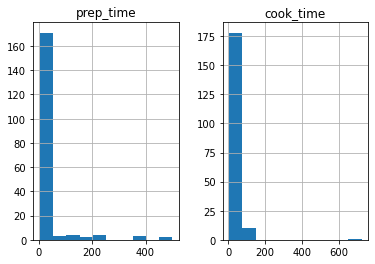

In [10]:
viz = cdf[['prep_time', 'cook_time']]
viz.hist()
plt.show()

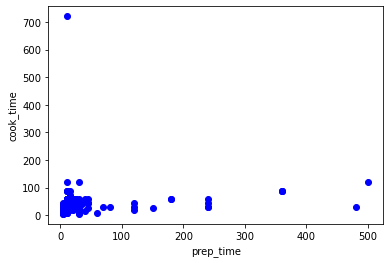

In [11]:
plt.scatter(cdf.prep_time, cdf.cook_time, color='blue')
plt.xlabel('prep_time')
plt.ylabel('cook_time')
plt.show()

# Подготовка данных к обучению и тестированию модели:

In [12]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

X = train.drop(['region', 'name'], axis=1)
y = train[['region', 'name']]

# Обучение модели:

In [14]:
model.fit(X, y)

RandomForestClassifier()

# Тренировка модели:

In [15]:
from sklearn.metrics import r2_score

test_X = train.drop(['region', 'name'], axis=1)
test_y = train[['region', 'name']]
result = model.predict(test_X)

result

array([['East', 'Balu shahi'],
       ['West', 'Boondi'],
       ['East', 'Mihidana'],
       ['East', 'Gulab jamun'],
       ['West', 'Imarti'],
       ['West', 'Imarti'],
       ['East', 'Kalakand'],
       ['North', 'Lassi'],
       ['South', 'Gheela Pitha'],
       ['East', 'Phirni'],
       ['East', 'Chhena poda'],
       ['West', 'Palathalikalu'],
       ['South', 'Singori'],
       ['West', 'Doodhpak'],
       ['West', 'Imarti'],
       ['East', 'Chhena poda'],
       ['East', 'Cham cham'],
       ['East', 'Kheer sagar'],
       ['East', 'Ledikeni'],
       ['East', 'Kalakand'],
       ['North', 'Malapua'],
       ['East', 'Mihidana'],
       ['North East', 'Pithe'],
       ['East', 'Mihidana'],
       ['East', 'Rasgulla'],
       ['South', 'Bandar laddu'],
       ['East', 'Kalakand'],
       ['South', 'Gheela Pitha'],
       ['South', 'Singori'],
       ['South', 'Obbattu holige'],
       ['West', 'Palathalikalu'],
       ['South', 'Poornalu'],
       ['South', 'Pongal'],
     

# Для примера создаю словарь с ключами колонками и значениями = 0:

In [16]:
{ col:[0] for col in X.columns }

{'prep_time': [0],
 'cook_time': [0],
 'diet_non vegetarian': [0],
 'diet_vegetarian': [0],
 'flavor_profile_bitter': [0],
 'flavor_profile_sour': [0],
 'flavor_profile_spicy': [0],
 'flavor_profile_sweet': [0],
 'course_dessert': [0],
 'course_main course': [0],
 'course_snack': [0],
 'course_starter': [0]}

# Задаю параметры:

In [17]:
example = {
    'prep_time': [17],
    'cook_time': [70],
    'diet_non vegetarian': [1],
    'diet_vegetarian': [0],
    'flavor_profile_bitter': [0],
    'flavor_profile_sour': [0],
    'flavor_profile_spicy': [1],
    'flavor_profile_sweet': [0],
    'course_dessert': [0],
    'course_main course': [0],
    'course_snack': [1],
    'course_starter': [0]
}

# Получаю предсказание:

In [18]:
example_df = pd.DataFrame(example)
model.predict(example_df)

array([['North', 'Fara']], dtype=object)

In [19]:
model.predict_proba(example_df)

[array([[0.28      , 0.01714286, 0.31666667, 0.1       , 0.14333333,
         0.14285714]]),
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.09      ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00666667, 0.        , 0.025     , 0.        , 0.        ,
         0.008     , 0.        , 0.        , 0.15      , 0.00333333,
         0.01714286, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.01      , 0.        ,
         0.        , 0.28      , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.006     , 0.06      , 0.01      ,
         0.        , 0.        , 0.1       , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0

In [20]:
model.classes_

[array(['Central', 'East', 'North', 'North East', 'South', 'West'],
       dtype=object),
 array(['Aloo gobi', 'Aloo methi', 'Aloo shimla mirch', 'Aloo tikki',
        'Alu Pitika', 'Amti', 'Anarsa', 'Attu', 'Avial', 'Bajri no rotlo',
        'Balu shahi', 'Bandar laddu', 'Basundi', 'Bebinca', 'Beef Fry',
        'Bhatura', 'Bhindi masala', 'Biryani', 'Bisi bele bath', 'Boondi',
        'Butter chicken', 'Chak Hao Kheer', 'Chakali', 'Cham cham',
        'Chana masala', 'Chevdo', 'Chhena jalebi', 'Chhena poda',
        'Chicken Tikka', 'Chicken Varuval', 'Chingri malai curry',
        'Chole bhature', 'Chorafali', 'Churma Ladoo',
        'Currivepillai sadam ', 'Daal Dhokli', 'Daal baati churma',
        'Daal puri', 'Dal makhani ', 'Dal tadka', 'Dhokla', 'Dhondas',
        'Doodhpak', 'Dosa', 'Double ka meetha', 'Dum aloo', 'Fara',
        'Galho', 'Gheela Pitha', 'Ghevar', 'Gud papdi', 'Gulab jamun',
        'Handwo', 'Haq Maas', 'Idli', 'Imarti', 'Jalebi', 'Kachori',
        'Kadai p

In [21]:
import pickle

In [22]:
filename = 'indian_kitchen.sav'
pickle.dump(model, open(filename, 'wb'))